# Plot hourly mean temperatures
- This script is used to plot hourly mean ground temperature, canopy air temperature, and ground temperature from simulations;
- Simulations: CNTL, TRAF at FR-Capitole and UK-Manchester. 

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
df_delta = pd.read_csv('delta_temperature_diurnal_mean.csv')
df_delta.head()

,value,hour,site,season,var
0,0.473556,0,FR-Cap,Summer,TRAFFICFLUX
1,0.474415,1,FR-Cap,Summer,TRAFFICFLUX
2,0.157867,2,FR-Cap,Summer,TRAFFICFLUX
3,0.157888,3,FR-Cap,Summer,TRAFFICFLUX
4,0.052694,4,FR-Cap,Summer,TRAFFICFLUX


In [3]:
df_traffic = df_delta[df_delta['var'] == 'TRAFFICFLUX']
df_traffic

,value,hour,site,season,var
0,0.473556,0,FR-Cap,Summer,TRAFFICFLUX
1,0.474415,1,FR-Cap,Summer,TRAFFICFLUX
2,0.157867,2,FR-Cap,Summer,TRAFFICFLUX
3,0.157888,3,FR-Cap,Summer,TRAFFICFLUX
4,0.052694,4,FR-Cap,Summer,TRAFFICFLUX
...,...,...,...,...,...
307,0.832682,19,UK-MCR,Winter,TRAFFICFLUX
308,0.666165,20,UK-MCR,Winter,TRAFFICFLUX
309,0.499548,21,UK-MCR,Winter,TRAFFICFLUX
310,0.499954,22,UK-MCR,Winter,TRAFFICFLUX


In [6]:
var_list = ['TG_U', 'TSA_U', 'TBUILD']
variable_list = ['$T_{grd}$', '$T_{air}$', '$T_{b}$', '$Q_{traffic}$']
site_list = ['FR-Cap', 'UK-MCR']
season_list = ['Summer', 'Winter']
period_list = ['JJA mean', 'DJF mean']
ncol = 2
nrow = 2
linewidth = 0.5
linestyle_list = ['dashed', 'solid']
case_list = ['cntl', 'traffic']
fontsize = 6
labelcolor = '#6b6b6b'
lc0 = '#1b9e77'
lc1 = '#d95f02'
lc2 = '#7570b3'
lc3 = '#e7298a'
lc = [lc0, lc1, lc2]
handletextpad = 0.5
label_list = ['CTNL', 'TRAF']
alpha=0.1
padding = 4
sitename_list = ['FR-Capitole', 'UK-Manchester']
xwidth = 0.5
labelfont = 6
pad = 1
length = 2
x_offset = 0.1

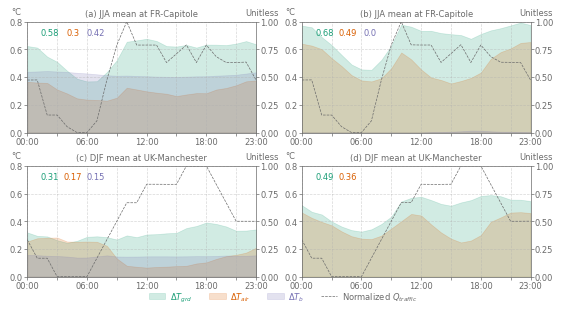

In [7]:

fig, axes = plt.subplots(nrow, ncol, figsize=(5.5, 3))
ax = axes.flatten()
for i in range(ncol*nrow):
    site = site_list[i//ncol]
    season = season_list[i%ncol]
    df_site_season = df_delta[(df_delta['site'] == site) & (df_delta['season'] == season)]
    for v, var in enumerate(var_list):
        df_var = df_site_season[df_site_season['var'] == var]
        if df_var['value'].any()>0:
            #value = (df_var['value']-df_var['value'].min()) / (df_var['value'].max()-df_var['value'].min())
            value = df_var['value']
            ax[i].fill_between(df_var['hour'], value, 
                               color=lc[v], alpha=0.2, linewidth=linewidth, label = r'$\Delta$' + variable_list[v]) #edgecolor='none'
            ax[i].text(0.1 + x_offset*v, 0.9, np.round(value.mean(),2), fontsize=fontsize, color=lc[v], ha='center', va='center', transform=ax[i].transAxes)
    ax2 = ax[i].twinx() 
    for spine in ax2.spines.values():   
        spine.set_visible(False)
    ax2.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)     
    ax2.set_ylim(0, 1)
    ax2.set_yticks(np.arange(0, 1.1, 0.25))
    target_traffic = df_traffic[(df_traffic['site'] == site) & (df_traffic['season'] == season)]
    ax2.plot(target_traffic['hour'], target_traffic['value'], color=labelcolor, linestyle = 'dashed', linewidth=linewidth, label = r'Normalized $Q_{traffic}$')
    ax2.set_ylabel('Unitless',labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    ax2.yaxis.set_label_coords(1.025, 1.125)
    ax[i].set_ylim(0, 0.8)
    ax[i].set_xlim(0, 23)
    ax[i].set_xticks([0, 6, 12, 18, 23])            
    #ax[i].set_xticklabels(np.arange(0, 24, 2), fontsize=fontsize)
    ax[i].set_xticklabels(['00:00', '06:00', '12:00', '18:00', '23:00'], fontsize=fontsize)
    ax[i].set_xticks(np.arange(0, 24, 3), minor=True)
    ax[i].set_title(f'({string.ascii_lowercase[i]}) {period_list[i//ncol]} at {sitename_list[i//ncol]}', fontsize=fontsize, color=labelcolor, pad=padding)
    for spine in ax[i].spines.values():
        spine.set_linewidth(xwidth)
        spine.set_edgecolor(labelcolor)
    ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)  
    ax[i].grid(True,which='both',linestyle='--',linewidth=0.5, alpha=0.5)  
    ax[i].set_ylabel('°C',labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    ax[i].yaxis.set_label_coords(-0.05, 1.05)
lines1, labels1 = ax[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=fontsize, ncol=4)
for i, text in enumerate(legend.get_texts()):
    text.set_color((lc+ [labelcolor])[i])
plt.subplots_adjust(left=0.035, right=0.95, bottom=0.1, top=0.95, wspace=0.2, hspace= 0.3)    
fig.savefig('delta_diurnal_mean.png', dpi=300)
fig.savefig('delta_diurnal_mean.pdf', dpi=600)

# Describe

In [38]:
df_hour = pd.read_csv('temperature_diurnal.csv')
df_winter = df_hour[df_hour['season'] == 'Winter']
df_winter_tair = df_winter[df_winter['var'] == 'TSA_U']
df_winter_tair_cntl = df_winter_tair[df_winter_tair['case'] == 'cntl']
df_winter_tair_cntl

,hour,value,site,season,case,var
96,0,5.321320,FR-Cap,Winter,cntl,TSA_U
97,1,5.157654,FR-Cap,Winter,cntl,TSA_U
98,2,4.887207,FR-Cap,Winter,cntl,TSA_U
99,3,4.727875,FR-Cap,Winter,cntl,TSA_U
100,4,4.541016,FR-Cap,Winter,cntl,TSA_U
101,5,4.359314,FR-Cap,Winter,cntl,TSA_U
102,6,4.239136,FR-Cap,Winter,cntl,TSA_U
103,7,4.151764,FR-Cap,Winter,cntl,TSA_U
104,8,4.041443,FR-Cap,Winter,cntl,TSA_U
105,9,4.059570,FR-Cap,Winter,cntl,TSA_U


In [39]:
df_winter_tair_traffic = df_winter_tair[df_winter_tair['case'] == 'traffic']
df_winter_tair_traffic

,hour,value,site,season,case,var
288,0,5.962524,FR-Cap,Winter,traffic,TSA_U
289,1,5.784973,FR-Cap,Winter,traffic,TSA_U
290,2,5.488709,FR-Cap,Winter,traffic,TSA_U
291,3,5.264648,FR-Cap,Winter,traffic,TSA_U
292,4,5.020721,FR-Cap,Winter,traffic,TSA_U
293,5,4.773895,FR-Cap,Winter,traffic,TSA_U
294,6,4.615509,FR-Cap,Winter,traffic,TSA_U
295,7,4.520783,FR-Cap,Winter,traffic,TSA_U
296,8,4.433075,FR-Cap,Winter,traffic,TSA_U
297,9,4.524231,FR-Cap,Winter,traffic,TSA_U
